In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_nasa = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/asteroids_nasa.csv')
df_nasa.head(5)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


Salteo el análisis ya que es un dataset que conocemos
# Preprocesamiento de datos

In [3]:
X = df_nasa.drop(columns="Hazardous")
y = df_nasa["Hazardous"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

columnas = [ 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)',
       'Orbit ID', 'Orbit Uncertainity','Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly','Mean Motion']

In [4]:
pl = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columnas)], remainder="drop")),
    ('classifier', DecisionTreeClassifier(max_depth=2, random_state=1))
])
pl.fit(X_train, y_train)

,steps,"[('selector', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('selector', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [5]:
y_pred_tc = pl.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_tc)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_tc))

Exactitud (accuracy) del modelo: 99.36 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      1194
        True       1.00      0.96      0.98       213

    accuracy                           0.99      1407
   macro avg       0.99      0.98      0.99      1407
weighted avg       0.99      0.99      0.99      1407



# Comparamos por curva ROC los modelos

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

pl_knn = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columnas)], remainder="drop")),
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('classifier', KNeighborsClassifier(n_neighbors=11))
])
pl_knn.fit(X_train, y_train)
y_pred_knn = pl_knn.predict(X_test)

pl_NBg = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columnas)], remainder="drop")),
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('classifier', GaussianNB())
])
pl_NBg.fit(X_train, y_train)
y_pred_gauss = pl_NBg.predict(X_test)

pl_NGm = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columnas)], remainder="drop")),
    ('classifier', MultinomialNB())
])
pl_NGm.fit(X_train, y_train)
y_pred_nb = pl_NGm.predict(X_test)

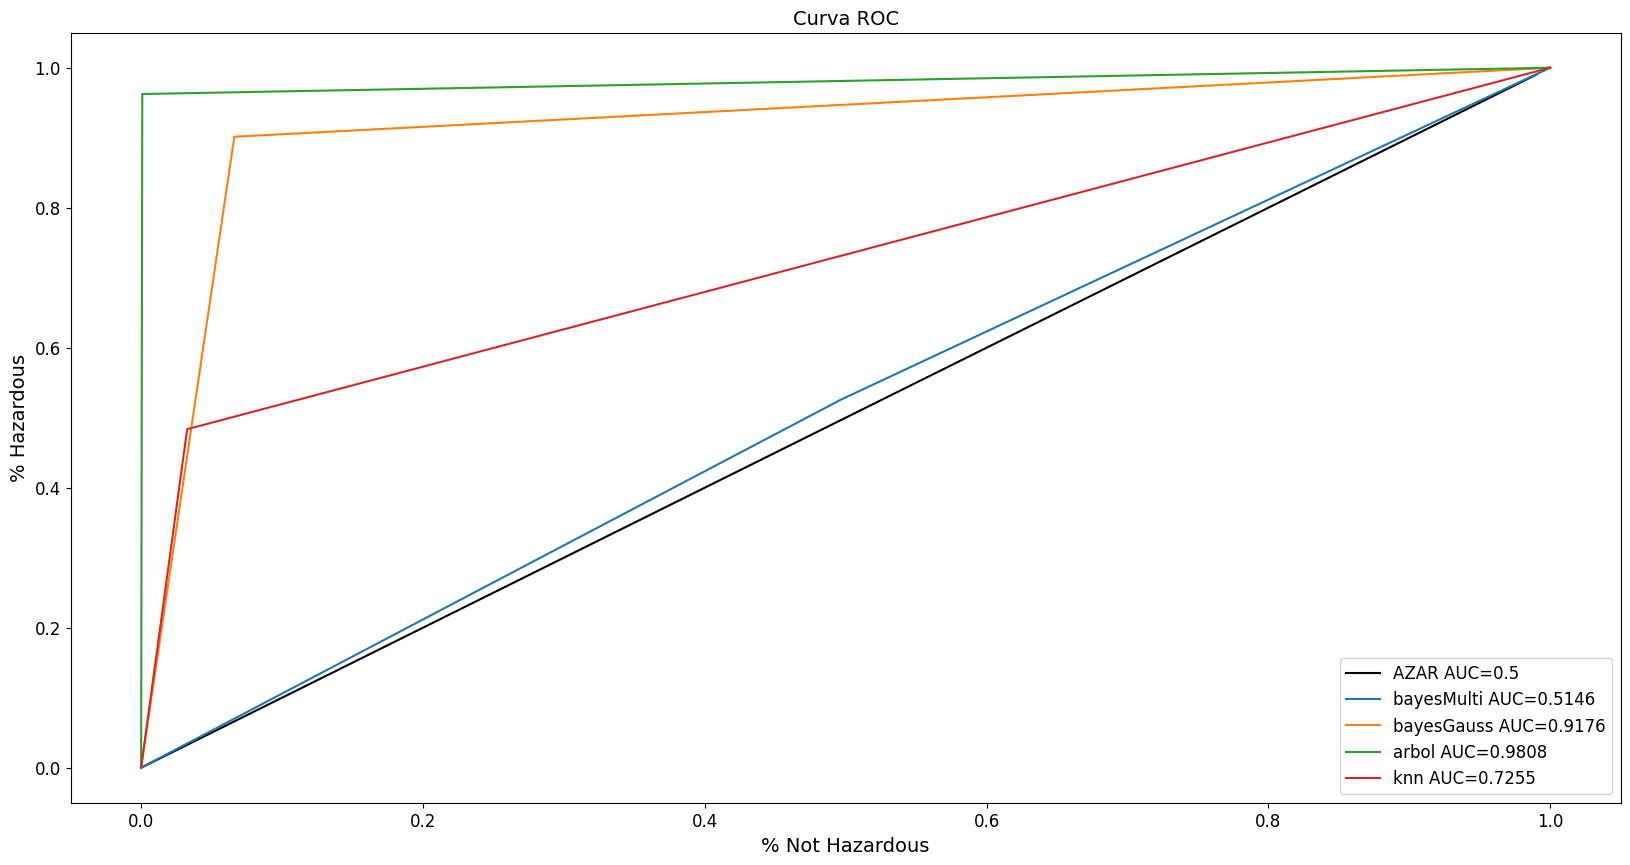

In [7]:
def graficarCurvaRoc( y_pred, model ):
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred)
  # Graficamos
  plt.plot(fpr,tpr,label= model +" AUC="+str(round(auc,4))) #,label= "AUC="+str(auc))
  plt.legend(loc=4, fontsize=12)
  return auc

# Inicializamos los labels del gráfico
plt.figure(figsize=(20, 10))
plt.xlabel('% Not Hazardous', fontsize=14)
plt.ylabel('% Hazardous', fontsize=14)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR AUC=0.5",color="black")

modelos = {'bayesMulti':y_pred_nb, 'bayesGauss':y_pred_gauss,
             'arbol':y_pred_tc,'knn':y_pred_knn}
for pred in modelos:
    auc = graficarCurvaRoc( modelos[pred] , pred )

# Agregamos el titulo y configuro el tamaño de letra
plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

# Mejoramos el modelo de Arbol de Decision con GridSearch

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "classifier__max_depth": [2, 5, 7, 10, None],
        "classifier__min_samples_leaf": [2, 10, 50, 75, 100, 200],
        "classifier__criterion": ['gini', 'entropy', 'log_loss'],
        "classifier": [DecisionTreeClassifier()]
    }]

grid_search = GridSearchCV(pl, param_grid, cv=10, verbose=1,n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


,estimator,Pipeline(step...om_state=1))])
,param_grid,"[{'classifier': [DecisionTreeClassifier()], 'classifier__criterion': ['gini', 'entropy', ...], 'classifier__max_depth': [2, 5, ...], 'classifier__min_samples_leaf': [2, 10, ...]}]"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,10
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('selector', ...)]"


In [9]:
y_pred_gsCV = grid_search.best_estimator_.predict(X_test)
print(grid_search.best_params_)

{'classifier': DecisionTreeClassifier(), 'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 50}


0.9808018968079836

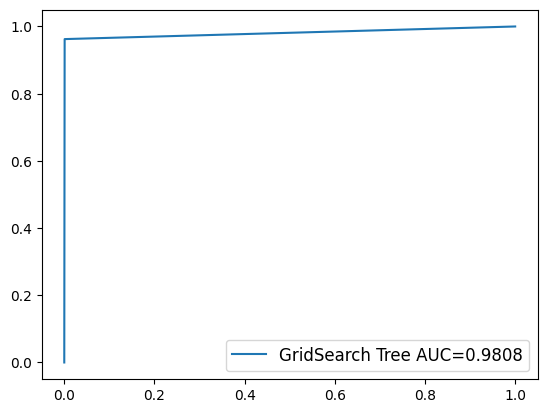

In [10]:
graficarCurvaRoc(y_pred_gsCV, "GridSearch Tree")

# Ejercicio
- Usar el step de "selector" del pipeline para remover las columnas redundantes
- Crear un pipeline para el clasificador randomforest
- Usar GridSearchCV para encontrar el valor optimo de k en KNN